In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
nw=pd.read_csv('~/Downloads/Titanic-preprocessed.csv')
nw['Embarked']=nw['Embarked'].map({'S':0,'C':1})
Titles={'Title':{'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':4,'Rev':5,'Mlle':6,'Major':7,'Col':8,'the Countess':9,'Don':10,'Jonkheer':11,'Capt':12,'Lady':13,'Ms':14,'Sir':15,'Mme':16}}
nw.replace(Titles, inplace=True)
nw.head()
print(nw['Title'].value_counts())
nw.drop('Title',axis='columns',inplace=True)



 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Don               1
 Jonkheer          1
 Capt              1
 Lady              1
 Ms                1
 Sir               1
 Mme               1
Name: Title, dtype: int64


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x=nw[["Pclass",'Age','PassengerId','Fare','Sex']]
y=nw["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing modelâ€™s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.79


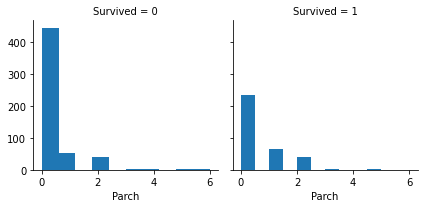

In [104]:
g=sns.FacetGrid(nw,col='Survived')
g.map(plt.hist,'Parch')

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       189
           1       0.75      0.71      0.73       123

    accuracy                           0.79       312
   macro avg       0.78      0.78      0.78       312
weighted avg       0.79      0.79      0.79       312



In [106]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[160,  29],
       [ 36,  87]])

In [107]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.776938959865789